# Import modules

In [87]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot
np.random.seed(42)
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline
import re
from kmodes.kprototypes import KPrototypes

In [88]:
#pip install kmodes

# Import data

In [117]:
df = pd.read_csv('C:\ET_lab_5\hyderabad-salaried-employees.csv')

In [90]:
df.head()

,candidateName,companyName,designation,emailAddress,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,tel_Other,Category
0,Ruchismita Dash,Amdocs,Software Developer,ruchidash89@gmail.com,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,8390909230,HYDERABAD-SALARIED
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,manisha.das82@gmail.com,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,9701900131,HYDERABAD-SALARIED
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,geethapriya89@gmail.com,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,9705407817,HYDERABAD-SALARIED
3,SRIKANTH,Axis Bank Ltd,NaN,sburisetty@gmail.com,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,8142444544,HYDERABAD-SALARIED
4,Madduri Srinivas,CTS,Associate Projects,madduri12@gmail.com,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,9581812128,HYDERABAD-SALARIED


# Explanatory Data Analysis

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28847 entries, 0 to 28846
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   candidateName       28843 non-null  object
 1   companyName         28806 non-null  object
 2   designation         24217 non-null  object
 3   emailAddress        28835 non-null  object
 4   experienceMas       28847 non-null  object
 5   locationCurrentMas  28847 non-null  object
 6   qualificationMas    23971 non-null  object
 7   qualificationMas2   15449 non-null  object
 8   salary              28847 non-null  object
 9   tel_Other           28847 non-null  int64 
 10  Category            28847 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.4+ MB


In [119]:
df.describe()

,tel_Other
count,2.884700e+04
mean,9.263010e+09
std,7.763916e+08
min,6.306329e+09
25%,8.977538e+09
50%,9.581167e+09
75%,9.867318e+09
max,9.999979e+09


In [92]:
df.select_dtypes('object').nunique()

candidateName         27288
companyName           15153
designation           12636
emailAddress          28806
experienceMas           492
locationCurrentMas        3
qualificationMas         51
qualificationMas2        48
salary                 1560
Category                  1
dtype: int64

In [93]:
df['Category'].value_counts()

HYDERABAD-SALARIED    28847
Name: Category, dtype: int64

In [94]:
df['locationCurrentMas'].value_counts()

Hyderabad/ Secunderabad    28841
Hyderabad                      3
Hyderabad                      3
Name: locationCurrentMas, dtype: int64

In [120]:
df['companyName'].value_counts()

Currently Unemployed                                   804
Cognizant Technology Solutions                         518
Infosys Technologies Ltd                               429
Accenture Pvt Ltd                                      404
Tata Consultancy Services Ltd                          393
                                                      ... 
Alipore Judges Court                                     1
right now im fresher                                     1
KeyPoint Technologies                                    1
B E Aerospace Engineering  Service India Pvt India       1
Sierra Cedar                                             1
Name: companyName, Length: 15153, dtype: int64

In [121]:
df['designation'].value_counts()

Currently Unemployed          778
Assistant Manager             419
Manager                       349
Senior Software Engineer      282
Project Manager               265
                             ... 
Sr. Planning Engineer           1
Assistant Manager OPS           1
Network Security Engineer       1
Manager - Design                1
Mobility Technology Lead        1
Name: designation, Length: 12636, dtype: int64

In [122]:
df['qualificationMas'].value_counts()

BE/ B.Tech (Engineering)            8922
B.Com. (Commerce)                   4078
B.Sc. (Science)                     3737
MBA/ PGDM                           1119
BA (Arts)                            788
Diploma-Other Diploma                763
Diploma-Engineering                  600
BCA (Computer Application)           467
MCA/ PGDCA                           430
M.Sc. (Science)                      428
Other School/ Graduation             327
BBA/ BBM/ BBS                        281
BL/LLB                               260
12th & Not Pursuing Graduation       241
B.Pharm. (Pharmacy)                  229
ME/ M.Tech./ MS (Engg/ Sciences)     209
M.Com. (Commerce)                    127
MBBS                                 127
BHM (Hotel Management)               110
B.Ed. (Education)                     94
Ph.D. (Doctorate)                     88
CA (Chartered Accountant)             87
B.Arch. (Architecture)                77
MA (Arts)                             61
BDS (Dental Surg

In [124]:
#

# Preprocessing of Data and Explanatory data analysis continued

In [125]:
df.drop(['Category','locationCurrentMas', 'tel_Other', 'emailAddress'], axis = 1, inplace = True)

In [126]:
df.head()

,candidateName,companyName,designation,experienceMas,qualificationMas,qualificationMas2,salary
0,Ruchismita Dash,Amdocs,Software Developer,2 Year(s) 1 Month(s),BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,5 Year(s) 9 Month(s),MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,4 Year(s) 4 Month(s),B.Com. (Commerce),NaN,Rs. 84.0 lacs
3,SRIKANTH,Axis Bank Ltd,NaN,7 Year(s) 11 Month(s),NaN,MBA/ PGDM,Rs. 7.0 lacs
4,Madduri Srinivas,CTS,Associate Projects,6 Year(s) 8 Month(s),B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs


In [127]:
df.set_index(["candidateName"], inplace = True,
                    append = True, drop = True)
df.dropna(inplace = True)

In [128]:
df.head()

,,companyName,designation,experienceMas,qualificationMas,qualificationMas2,salary
,candidateName,,,,,,
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,5 Year(s) 9 Month(s),MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs
4,Madduri Srinivas,CTS,Associate Projects,6 Year(s) 8 Month(s),B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs
6,Vijay Thakur,Bank Of America,Assistant Manager NonVoice Operations,11 Year(s) 4 Month(s),MBA/ PGDM,B.Com. (Commerce),Rs. 8.33 lacs
11,M R nagaraju,Telenor,territory sales manger,6 Year(s),B.Com. (Commerce),MBA/ PGDM,Rs. 5.0 lacs
21,VenkataramanaiahDodda,Tata Consultancy Services Ltd,Project Leader/ Tech Lead,10 Year(s) 3 Month(s),ME/ M.Tech./ MS (Engg/ Sciences),BE/ B.Tech (Engineering),Rs. 16.03 lacs


In [129]:
def func1(s):
    l = s.split()
    if len(l)<2:
        return 0.0
    if len(l)<3: 
        if l[1] == 'Year(s)':
            return float(l[0])
        else:
            return float('0.' + l[0])
    s1 = l[0]+'.'+l[2]
    return float(s1)

In [130]:
func = lambda x: float(x.split()[1])

In [131]:
df['experience'] = df['experienceMas'].apply(func1)
df['Salary'] = df['salary'].apply(func)
df.drop(['experienceMas','salary'], axis = 1, inplace = True)

In [132]:
df.head()

,,companyName,designation,qualificationMas,qualificationMas2,experience,Salary
,candidateName,,,,,,
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,MBA/ PGDM,B.Pharm. (Pharmacy),5.9,5.00
4,Madduri Srinivas,CTS,Associate Projects,B.Com. (Commerce),MCA/ PGDCA,6.8,8.05
6,Vijay Thakur,Bank Of America,Assistant Manager NonVoice Operations,MBA/ PGDM,B.Com. (Commerce),11.4,8.33
11,M R nagaraju,Telenor,territory sales manger,B.Com. (Commerce),MBA/ PGDM,6.0,5.00
21,VenkataramanaiahDodda,Tata Consultancy Services Ltd,Project Leader/ Tech Lead,ME/ M.Tech./ MS (Engg/ Sciences),BE/ B.Tech (Engineering),10.3,16.03


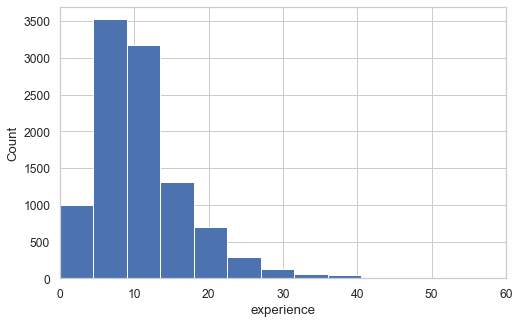

In [147]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['experience'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='experience', ylabel='Count',  xlim=(0, 60));

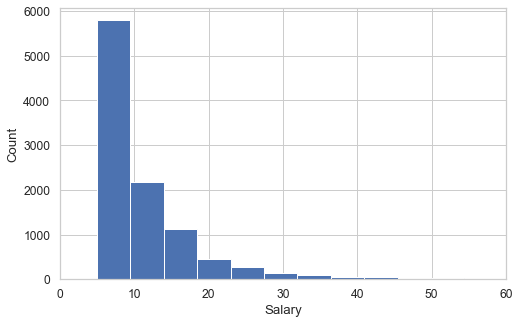

In [146]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Salary'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='Salary', ylabel='Count', xlim=(0, 60));

In [148]:
categorical = ['companyName', 'designation', 'qualificationMas', 'qualificationMas2']

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Clustering Algorithm

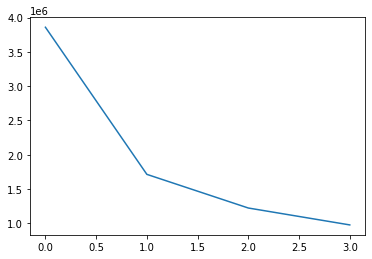

In [108]:
# Choose optimal K using Elbow method
categorical_features_idx = [0, 1, 2, 3]
mark_array= df.values

cost = []
for num_clusters in list(range(1,5)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(mark_array, categorical=categorical_features_idx)
    cost.append(kproto.cost_)

plt.plot(cost)

In [109]:
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 4244, ncost: 3202739.739940833
Run: 1, iteration: 2/20, moves: 1728, ncost: 3027804.581609424
Run: 1, iteration: 3/20, moves: 723, ncost: 2912102.2472349354
Run: 1, iteration: 4/20, moves: 489, ncost: 2810619.3911462673
Run: 1, iteration: 5/20, moves: 390, ncost: 2654334.641191876
Run: 1, iteration: 6/20, moves: 407, ncost: 2029393.9532281514
Run: 1, iteration: 7/20, moves: 366, ncost: 1225664.9311791803
Run: 1, iteration: 8/20, moves: 197, ncost: 1223632.341752254
Run: 1, iteration: 9/20, moves: 105, ncost: 1222998.6445132275
Run: 1, iteration: 10/20, moves: 74, ncost: 1222625.3693339846
Run: 1, iteration: 11/20, moves: 68, ncost: 1222326.850130304
Run: 1, iteration: 12/20, moves: 46, ncost: 1222202.256911848
Run: 1, iteration: 13/20, moves: 28, ncost: 1222137.2681707814
Run: 1, iteration: 14/20, moves: 18, ncost: 1222111.2113082735
Run: 1, iteration: 15/20, moves: 13, ncost

In [110]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
df['cluster'] = list(clusters)
df[df['cluster']== 0].head(10)

,,companyName,designation,qualificationMas,qualificationMas2,experience,Salary,cluster
,candidateName,,,,,,,
2871,sudheer dvs,IT Source Technologies,Wintel Administrator-L2,B.Com. (Commerce),MCA/ PGDCA,3.0,303.0,0
6292,Anand KUMAR,Syngene International Ltd,Senior executive,B.Sc. (Science),M.Sc. (Science),6.5,804.0,0
12516,Velangani Raj,Stem cell biotech company- LIFECELL INTERNATIO...,Senior Executive - Cord Blood Processing and q...,B.Sc. (Science),M.Sc. (Science),4.4,602.0,0
13919,G SHAMAVATHI,genpact pvt ltd,Date working as Analyst,MBA/ PGDM,Diploma-Other Diploma,8.0,325.0,0
18301,Sreenivas Bhamidipati,Franklin templeton investments,Senior accountant,B.Com. (Commerce),MBA/ PGDM,4.0,603.0,0
22895,Rahul Mukherjee,Unisys India,SSR2A,BCA (Computer Application),MBA/ PGDM,2.4,415.0,0
26272,Suman Kamarthapu,Munna united hospitality services,Restaurant manager,B.Com. (Commerce),MCA/ PGDCA,5.5,903.0,0


In [115]:
cluster_0 = df[df['cluster']== 0]
cluster_1 = df[df['cluster']== 1]
cluster_2 = df[df['cluster']== 2]

In [114]:
cluster_0.to_csv('C:\Assignment Submission\cluster_0.csv')

In [116]:
cluster_1.to_csv('C:\Assignment Submission\cluster_1.csv')
cluster_2.to_csv('C:\Assignment Submission\cluster_2.csv')